In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from fancyimpute import IterativeImputer

In [41]:
df= pd.read_csv('/Users/chris/Library/Containers/com.tencent.xinWeChat/Data/Library/Application Support/com.tencent.xinWeChat/2.0b4.0.9/cb57adccddf5921e6681fe69a9347f09/Message/MessageTemp/79fbb2b8df6d7d1ae4bb6e6a26080f74/File/df_final.csv')

In [42]:
# List of columns to remove from the DataFrame
columns_to_remove = [
    'ADM_RATE_ALL',
    'CONTROL',
    'PCTFLOAN',
    'UGDS',
    'ICLEVEL',
    'CDR3',
    'COMP_ORIG_YR4_RT',
    'GRAD_DEBT_MDN',
    'TUITFTE',
   
]

# Remove the listed columns
df = df.drop(columns_to_remove, axis=1)

In [43]:
df.columns

Index(['HIGHDEG', 'SAT_AVG_ALL', 'MD_EARN_WNE_P8', 'DEP_INC_AVG', 'UG25ABV',
       'PAR_ED_PCT_PS', 'RPY_3YR_RT', 'ATDCOST'],
      dtype='object')

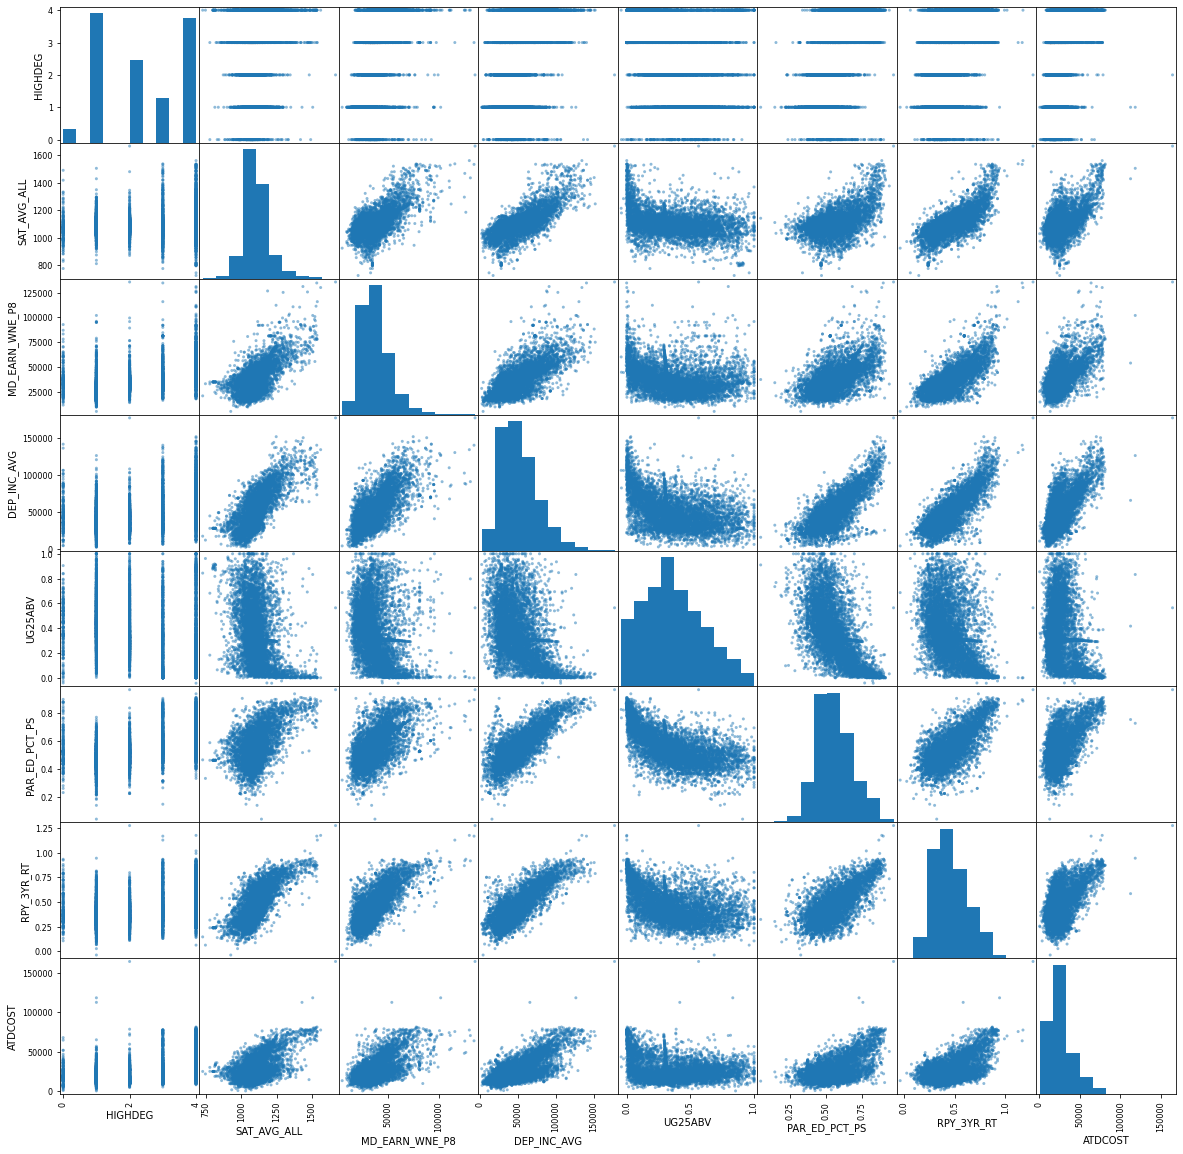

In [44]:
pd.plotting.scatter_matrix(df, figsize=(20,20))
plt.show()

### Data Descriptions

#### `HIGHDEG`
- **Source**: HIGHDEG
- **Type**: integer
- **Description**: 
  Highest degree awarded:
  - 0: Non-degree-granting
  - 1: Certificate degree
  - 2: Associate degree
  - 3: Bachelor's degree
  - 4: Graduate degree

#### `MD_EARN_WNE_P8`
- **Source**: MD_EARN_WNE_P8
- **Type**: float
- **Description**: 
  Median earnings of students working and not enrolled 8 years after entry.

#### `DEP_INC_AVG`
- **Source**: DEP_INC_AVG
- **Type**: integer
- **Description**: 
  Average family income of dependent students in real 2015 dollars.

#### `UG25ABV`
- **Source**: UG25ABV
- **Type**: float
- **Description**: 
  Percentage of undergraduates aged 25 and above.

#### `PAR_ED_PCT_PS`
- **Source**: PAR_ED_PCT_PS
- **Type**: float
- **Description**: 
  Percent of students whose parents' highest educational level was some form of postsecondary education.


Observing the scatter matrix using bare eyes, The features seem to be useful based on observing the scatter matrix, Temprature, Solar radiation, and functioning Day seem to be useful in predicting log_Rented_Bike_Count.

Observing the scatter matrix using our bare eyes, it seems that SAT_AVG_ALL, CONTROL, PAR_ED_PCT_PS,TUITFTE, ICLEVEL,COMP_ORIG_YR4_RT,DEP_INC_AVG, and ATDCOST. ( We select based on having corelation higher than 0.2)

In [45]:
# Split the data into a training set and a test set with 80% observations in the training set and 20% observations in the test set. 
from sklearn.model_selection import train_test_split

test_size = int(df.shape[0] * 0.2)
df_train, df_test = train_test_split(df, test_size=test_size, random_state=0)

In [46]:
df.info

<bound method DataFrame.info of       HIGHDEG  SAT_AVG_ALL  MD_EARN_WNE_P8   DEP_INC_AVG   UG25ABV  \
0         4.0   954.000000    35438.000000  34779.085684  0.061700   
1         4.0  1266.000000    45795.000000  61110.800384  0.179400   
2         4.0   869.060341    34571.000000  25211.032258  0.860600   
3         4.0  1300.000000    53186.000000  72240.892617  0.151900   
4         4.0   955.000000    30177.000000  34468.571812  0.067700   
...       ...          ...             ...           ...       ...   
6212      0.0  1061.520842    28245.646317  44042.604713  0.538192   
6213      0.0  1034.855124    25364.000000  30433.663158  0.637070   
6214      0.0  1094.217860    30067.970561  35381.047367  0.350273   
6215      0.0  1260.000000    55660.000000  94114.810846  0.057730   
6216      0.0  1094.217860    30067.970561  35381.047367  0.350273   

      PAR_ED_PCT_PS  RPY_3YR_RT       ATDCOST  
0          0.634172    0.253155  21924.000000  
1          0.658776    0.513963

In [47]:
X_train = df_train.drop('RPY_3YR_RT', axis=1)  
y_train = df_train['RPY_3YR_RT']
X_train = sm.add_constant(X_train)

x_test = df_test.drop('RPY_3YR_RT', axis=1)  
y_test = df_test['RPY_3YR_RT']

In [48]:
# Prepare training data
X_train = df_train.drop('RPY_3YR_RT', axis=1)
y_train = df_train['RPY_3YR_RT']
X_train = sm.add_constant(X_train)

# Fit the model
model = sm.OLS(y_train, X_train).fit()
summary = model.summary()
print(summary)
linear_regression_coefficients = model.params
# Prepare testing data similarly
X_test = df_test.drop('RPY_3YR_RT', axis=1)
X_test = sm.add_constant(X_test)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate and print MSE
train_mse = np.mean((y_train_pred - y_train) ** 2)
test_mse = np.mean((y_test_pred - y_test) ** 2)

print(f'Training MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

                            OLS Regression Results                            
Dep. Variable:             RPY_3YR_RT   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     2239.
Date:                Fri, 10 May 2024   Prob (F-statistic):               0.00
Time:                        15:52:49   Log-Likelihood:                 5341.4
No. Observations:                4974   AIC:                        -1.067e+04
Df Residuals:                    4966   BIC:                        -1.061e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.3154      0.022    -14.

Ridge Regression

In [49]:
lambdas = 10**np.linspace(5, -5, 101)

In [50]:
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from matplotlib.pyplot import subplots
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoCV

/Users/chris/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chris/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56.55112081190219, tolerance: 0.011310568951351258
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chris/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chris/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model

Optimal λ in the Ridge model: 0.007943282347242805


/Users/chris/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.714e+01, tolerance: 1.413e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


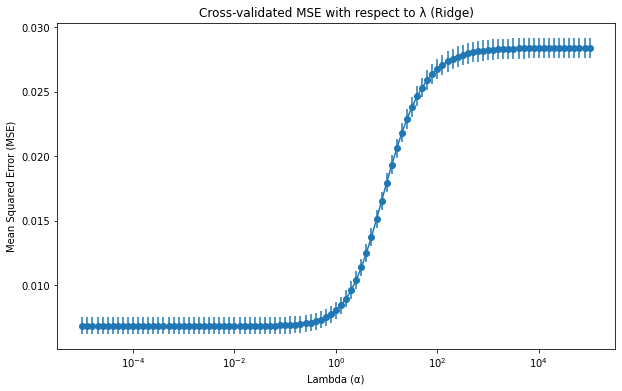

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import ElasticNetCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import sklearn.model_selection as skm
import sklearn.linear_model as skl

# Generate an array of lambda values (alphas)
lambdas = 10**np.linspace(5, -5, 101)

# Define the number of folds for cross-validation
K = 5
kfold = KFold(K, random_state=123, shuffle=True)

# Create the ElasticNetCV object with Ridge penalty (l1_ratio=0)
ridgeCV = ElasticNetCV(alphas=lambdas, l1_ratio=0, cv=kfold)

# Define a scaler
scaler = StandardScaler(with_mean=True, with_std=True)

# Create a pipeline that first scales the data then applies RidgeCV
pipeCV = Pipeline(steps=[('scaler', scaler), ('ridge', ridgeCV)])

# Fit the pipeline to the training data
pipeCV.fit(X_train, y_train)

# Extract the tuned Ridge regression model from the pipeline
tuned_ridge = pipeCV.named_steps['ridge']

# Get the optimal alpha (lambda) value for Ridge regression
optimal_lambda_ridge = tuned_ridge.alpha_

# Print the optimal alpha (lambda) value
print(f"Optimal λ in the Ridge model: {optimal_lambda_ridge}")

# Get the mean square errors for each model
mse_path = tuned_ridge.mse_path_

# Calculate the mean and standard deviation of the MSE for each alpha
mean_mse = np.mean(mse_path, axis=1)
std_mse = np.std(mse_path, axis=1)

# Plot the MSE with respect to the lambda values
plt.figure(figsize=(10, 6))
plt.errorbar(lambdas, mean_mse, yerr=std_mse, fmt='-o')
plt.xlabel('Lambda (α)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xscale('log')
plt.title('Cross-validated MSE with respect to λ (Ridge)')
plt.show()


In [52]:
from sklearn.linear_model import Ridge

# Using the optimal lambda found by RidgeCV to refit ridge
ridge_optimal_lambda = tuned_ridge.alpha_

# Create a Ridge regression object with the optimal lambda value
ridge_optimal = Ridge(alpha=ridge_optimal_lambda)

# Fit the Ridge model using the optimal lambda on the training data
ridge_optimal.fit(X_train, y_train)

# Predict on training and test data using the fitted model
y_train_pred_optimal = ridge_optimal.predict(X_train)
y_test_pred_optimal = ridge_optimal.predict(X_test)

# Calculate MSE for the optimal model on training and test data
train_mse_optimal = mean_squared_error(y_train, y_train_pred_optimal)
test_mse_optimal = mean_squared_error(y_test, y_test_pred_optimal)


(train_mse_optimal, test_mse_optimal)


(0.006835527040365417, 0.007659202420207112)

Lasso Regression

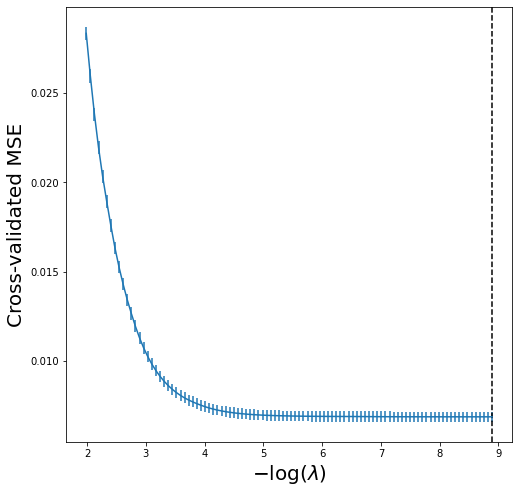

In [53]:
# Step 1: Fit LassoCV to find optimal λ
lassoCV = skl.ElasticNetCV(n_alphas=100, 
                           l1_ratio=1, 
                           cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler), ('lasso', lassoCV)])
pipeCV.fit(X_train, y_train)
tuned_lasso = pipeCV.named_steps['lasso']
lasso_optimal_lambda = tuned_lasso.alpha_

# Step 2: Plot MSE vs. Lambda
lassoCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(tuned_lasso.alphas_),
tuned_lasso.mse_path_.mean(1),
yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_lasso.alpha_), c='k', ls='--')
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);




In [54]:
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Assume df_train and df_test are your DataFrame and 'RPY_3YR_RT' is the target variable
X_train = df_train.drop('RPY_3YR_RT', axis=1)
y_train = df_train['RPY_3YR_RT']
X_test = df_test.drop('RPY_3YR_RT', axis=1)
y_test = df_test['RPY_3YR_RT']

# Assume tuned_lasso.alpha_ has been determined via a method such as LassoCV
alpha_optimal = tuned_lasso.alpha_

# Setting up the pipeline with a scaler and Lasso using the optimal alpha
lasso = ElasticNet(alpha=alpha_optimal, l1_ratio=1)  # l1_ratio=1 makes it equivalent to Lasso
scaler = StandardScaler()
pipe = Pipeline(steps=[('scaler', scaler), ('lasso', lasso)])

# Fitting the model
pipe.fit(X_train, y_train)

# Predicting on both train and test sets
train_pred = pipe.predict(X_train)
test_pred = pipe.predict(X_test)

# Calculating MSE for both train and test sets
train_mse = np.mean((y_train - train_pred) ** 2)
test_mse = np.mean((y_test - test_pred) ** 2)

# Print MSE values
print(f'Train MSE using optimal λ: {train_mse}')
print(f'Test MSE using optimal λ: {test_mse}')


Train MSE using optimal λ: 0.006835691644612117
Test MSE using optimal λ: 0.007657329808167464


In [55]:
# Step 3: Calculate MSE using optimal λ
lasso = skl.ElasticNet(alpha=tuned_lasso.alpha_, l1_ratio=1)
scaler = StandardScaler(with_mean=True, with_std=True)
pipe = Pipeline(steps=[('scaler', scaler), ('lasso', lasso)]) 
pipe.fit(X_train, y_train)

test_pred = pipe.predict(X_test)

test_mse = np.mean((y_test - test_pred)**2)
print(f'Test MSE using optimal λ: {test_mse}')

Test MSE using optimal λ: 0.007657329808167464


In [56]:
# Fit the Lasso model with the optimal alpha found by LassoCV
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=lasso_optimal_lambda)
lasso_model.fit(X_train, y_train)

# Retrieve the Lasso coefficients
lasso_coefficients = lasso_model.coef_

# Fit the Ridge model with the optimal alpha found by RidgeCV or specified alpha
ridge_model = Ridge(alpha=ridge_optimal_lambda) # Replace with the correct alpha for Ridge
ridge_model.fit(X_train, y_train)

# Retrieve the Ridge coefficients
ridge_coefficients = ridge_model.coef_

# Print the coefficients
print("Lasso Coefficients:", lasso_coefficients)
print("Ridge Coefficients:", ridge_coefficients)


Lasso Coefficients: [ 4.32425364e-03  4.07881887e-04  3.15905416e-06  2.13990246e-06
 -5.69369777e-02  1.97552605e-01 -3.83930337e-07]
Ridge Coefficients: [ 3.71009685e-03  4.07989399e-04  3.17502166e-06  2.04074961e-06
 -5.63442193e-02  2.24878658e-01 -3.83718198e-07]


| Feature        | OLS Coefficient | Lasso Coefficient | Ridge Coefficient |
|----------------|----------------:|------------------:|------------------:|
| const          |     -0.3154     |       0.0000      |       0.0000      |
| HIGHDEG        |      0.0037     |       0.0043      |       0.0037      |
| SAT_AVG_ALL    |      0.0004     |       0.0004      |       0.0004      |
| MD_EARN_WNE_P8 |      3.175e-06  |       3.159e-06   |       3.175e-06   |
| DEP_INC_AVG    |      2.04e-06   |       2.139e-06   |       2.040e-06   |
| UG25ABV        |     -0.0563     |      -0.0569      |      -0.0563      |
| PAR_ED_PCT_PS  |      0.2250     |       0.1975      |       0.2249      |
| ATDCOST        |     -3.837e-07  |      -3.839e-07   |      -3.837e-07   |


In [57]:
from sklearn.tree import DecisionTreeRegressor as DTR

In [58]:
# reg = DTR(max_depth=3)
reg = DTR()
reg.fit(X_train, y_train)
np.mean((y_test - reg.predict(X_test))**2)

0.010938296287891922